# Sprint 7 Project - Introduction to Machine Learning

## Project Overview

**Problem Summary** - Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. Because I have access to behavioral data about subscribers who have already switched to the new plans, I will develop a classification model that will pick the right plan for subscribers on legacy plans. 

**Objective** - Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. 

**In this project, I will** - 
 - Open and look through the data file
 - Split the data into a training set, a validation set, and a test set
 - Investigate the quality of different models by changing hyperparameters and describe the findings
 - Check the quality of the model using the test set

##  Import Libraries

In [1]:
# Import libraries required for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# From sklearn get classification models, accuracy score, and training data split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Show all columns when displaying dataframe
pd.set_option('display.max_columns', None)

## Read in Data

In [2]:
# Read in csv to a dataframe called behavior
behavior = pd.read_csv('/datasets/users_behavior.csv')

# Print sample of dataframe
behavior.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


### Description of Fields in Dataset

**Data Description**
Every observation in the dataset contains monthly behavior information about one user. The information given is as follows: 
  - **сalls** — number of calls
  - **minutes** — total call duration in minutes
  - **messages** — number of text messages
  - **mb_used** — Internet traffic used in MB
  - **is_ultra** — plan for the current month (Ultra - 1, Smart - 0)

## Prepare the Data For Analysis
*__Please note that__ for this project specifically, the data preprocessing step has already been performed, and that I will move straight to creating the classification models.*

## Explore the Data

In [3]:
# Check for missing values
behavior.isna().sum()

# Check values for each column
behavior.describe()

# Check data types
#behavior.info()

# Check data
#behavior.head(10)

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


array([[<AxesSubplot:title={'center':'calls'}>,
        <AxesSubplot:title={'center':'minutes'}>],
       [<AxesSubplot:title={'center':'messages'}>,
        <AxesSubplot:title={'center':'mb_used'}>],
       [<AxesSubplot:title={'center':'is_ultra'}>, <AxesSubplot:>]],
      dtype=object)

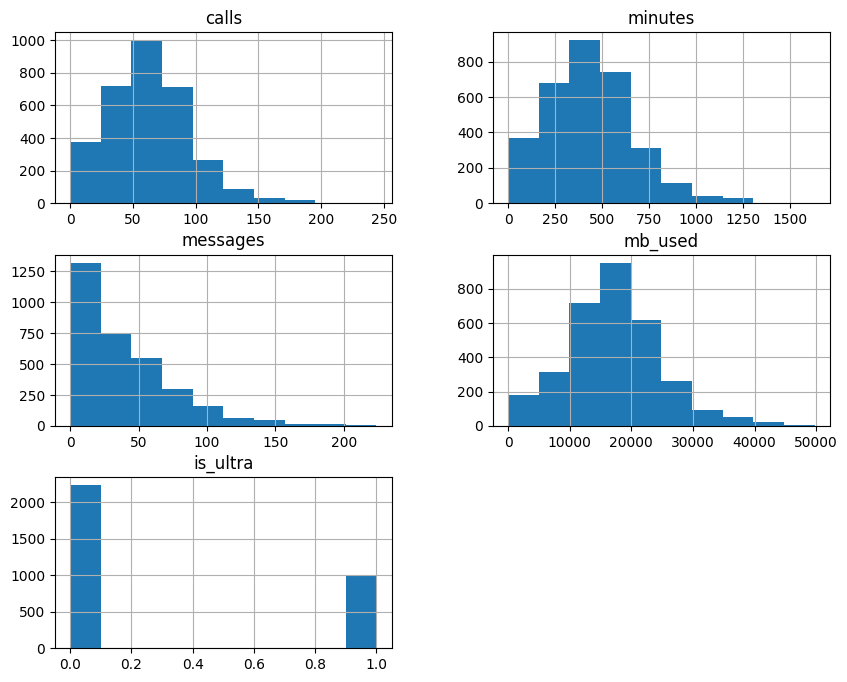

In [4]:
# Create a quick histogram to check distribution of data for each field
behavior.hist(figsize=(10, 8))

After exploring the data,
 - There aren't any missing values
 - Data types are correct and do not need to be changed
 - Minutes, Calls, and Message have a fairly normal distribution, but messages is skewed right.

## Create Training Set, Validation Set & Test Set

In [5]:
# is_ultra is the column that we are trying to predict (Ultra - 1, Smart - 0)

# Create Training, Validation, and Test Datasets. Split 3:1:1 since I was not provided with a test set

# First we will split .40 to get a traning dataset of 60% of the data source 
# The validiation set will be split in half to get 3 datasets with a ration of 3:1:1
# Set Random State to 12345 to Replicate Training Set in Future
df_training_set, df_validation_set = train_test_split(behavior, test_size=0.40, random_state=12345)

df_validation_set_split, df_test_set = train_test_split(df_validation_set, test_size=0.50, random_state=12345)

# Create the features and target training datasets
features_train = df_training_set.drop(['is_ultra'], axis=1)
target_train = df_training_set['is_ultra']

# Create the features and target validation datasets
features_valid = df_validation_set_split.drop(['is_ultra'], axis=1)
target_valid = df_validation_set_split['is_ultra']

# Create the features and target test datasets
features_test = df_test_set.drop(['is_ultra'], axis=1)
target_test = df_test_set['is_ultra']

# Check the shape of these dataframes
print(behavior.shape)       # 3214 rows

#Training 
print(features_train.shape) # Training set contains 60% of original dataframe rows 
print(target_train.shape)   # Training set contains 60% of original dataframe rows 

# Validation
print(features_valid.shape) # Validation set contains 60% of original dataframe rows 
print(target_valid.shape)   # Validation set contains 60% of original dataframe rows 

# Test
print(features_test.shape)  # Test set contains 60% of original dataframe rows 
print(target_test.shape)    # Test set contains 60% of original dataframe rows 

(3214, 5)
(1928, 4)
(1928,)
(643, 4)
(643,)
(643, 4)
(643,)


2) test set doesn't exist. In that case, the source data has to be split into three parts: training, validation, and test. The sizes of validation set and test set are usually equal. It gives us source data split in a 3:1:1 ratio.

The first time to split the original DataFrame (users_behavior.csv) in the train_validation set (one DataFrame) and test set (test_size=0.2). 

And the second time to split the DataFrame train_validation(from the first step ) to the train set and validation set (test_size=0.25)

The training set should have a shape of (1928, 4)

And the test and validation sets a shape of (643, 4)

Now that we have our training and validation datasets, we can train our model on the training dataset and then apply the model to the validatation dataset to evaluate how well it predicts plans.

## Model Testing & Tuning on Training & Validation Sets

Because we are determining which plan to recommend to users, which is categorical (Ultra - 1, Smart - 0), we will use a classification model and not a regression model. In the cells below, I will test which model has a higher accuracy after tuning the models.

### Decision Tree Classification Model

In [6]:
# For our Decision Tree Classification Model The Parameter That We Need to Tune is Tree Depth
# To determine the most optimal tree depth for the highest model accuracy, we will use the following code
best_result = 0
best_depth = 0

# For tree depth between 1 to 6, calculate the optimal tree depth and evaluate model for greatest accuracy
for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # create a model with the given depth
    model.fit(features_train,target_train) # train the model
    predictions = model.predict(features_valid) # get the model's predictions
    result = accuracy_score(target_valid,predictions) # calculate the accuracy
    if result > best_result:
        best_result = result
        best_depth = depth
    
    # Print model accuracy at each depth
    print("At a depth of", depth, "the accuracy of the model is", round(result,5))

# Print the accuracy of the model and which depth produced the greatest accuracy  
print()
print("The accuracy of the best model is", round(best_result,5), "at a depth of",best_depth)

At a depth of 1 the accuracy of the model is 0.75428
At a depth of 2 the accuracy of the model is 0.78227
At a depth of 3 the accuracy of the model is 0.78538
At a depth of 4 the accuracy of the model is 0.77916
At a depth of 5 the accuracy of the model is 0.77916

The accuracy of the best model is 0.78538 at a depth of 3


The accuracy of the best Decision Tree Classification Model is 0.78583 at a depth of 3 which is a candidate because it's above our threshold of 0.75 for model accuracy. Let's check how the other models perform. 

### Random Forest Classification Model

In [7]:
# For our Random Forest Classification Model The Parameter That We Need to Tune is n_estimators
# n_estimators is the number of trees to be used in the forest
# To determine the most optimal tree depth for the highest model accuracy, we will use the following code
best_score = 0
best_est = 0

# For n_estimators between 1 and 11, calculate the optimal number of trees to be used in the forest and evaluate model for greatest accuracy
for est in range(1, 11):
    model = RandomForestClassifier(random_state=54321, n_estimators=est)
    model.fit(features_train, target_train)
    score = model.score(features_valid, target_valid)
    if score > best_score:
        best_score = score
        best_est = est

    # Print model accuracy at each depth
    print("With", est, "as the n_estimators, the accuracy of the model is", round(score,5))

# Print the accuracy of the model and which depth produced the greatest accuracy  
print()        
print("The accuracy of the best model on the validation set had n_estimators set to", best_est, "with a score of", round(best_score,5))

With 1 as the n_estimators, the accuracy of the model is 0.69362
With 2 as the n_estimators, the accuracy of the model is 0.74961
With 3 as the n_estimators, the accuracy of the model is 0.75272
With 4 as the n_estimators, the accuracy of the model is 0.75428
With 5 as the n_estimators, the accuracy of the model is 0.74495
With 6 as the n_estimators, the accuracy of the model is 0.75739
With 7 as the n_estimators, the accuracy of the model is 0.76361
With 8 as the n_estimators, the accuracy of the model is 0.77449
With 9 as the n_estimators, the accuracy of the model is 0.76205
With 10 as the n_estimators, the accuracy of the model is 0.77916

The accuracy of the best model on the validation set had n_estimators set to 10 with a score of 0.77916


### Logistic Regression Classification Model

In [8]:
# Create a Logistic Regression Model
model = LogisticRegression(random_state=54321, solver="liblinear")

# Fit the model to the traning dataset
model.fit(features_train, target_train)

# Score the model accuracy on the traning and validation data sets
score_train = model.score(features_train, target_train)
score_valid = model.score(features_valid, target_valid)

# Print the accuracy of the model on the traning and validation datasets
print("The accuracy of the logistic regression model on the training set is", round(score_train,5))
print("The accuracy of the logistic regression model on the validation set is:",round(score_valid,5))

The accuracy of the logistic regression model on the training set is 0.75052
The accuracy of the logistic regression model on the validation set is: 0.75894


## Model Selection to Run on Test Set

The Decision Tree Classification Model has the highest accuracy when applied to the validation training data set. Additionally, all three models are above the acceptable threshold for accuracy (75%). Below, I've listed out the accuracy of each model after tuning.  

- **Decision Tree Classification Model With Depth of 3**
  - Model Accuracy on Validation Set: 78.58%
- **Random Forest Classification Model With n_estimators = 10** 
  - Model Accuracy on Validation Set: 77.91%
- **Logistic Regression Classification Model**
  - Model Accuracy on Validation Set: 75.89%

I am going to continue with the Decision Tree Classification Model to run on the test set because it has the highest accuracy, but it should be noted that picking one of the two models depends on it's application and the amount of data the model is being applied to. Decision Tree models are often less accurate compared to Random Forest models, but are often faster at processing data when compared to Random Forest models. Since the Random Forest Classification Model has high accuracy as well, there should be consideration for it going forward, but again I will continue with the Decision Tree Classification Model

### Testing the Decision Tree Classification Model on the Test Set

In [9]:
# Using the Decision Tree Classification Model on the test set

# Use Decision Tree Classification Model with depth of 3 because this gave us highest accuracy in testing on validation set
model = DecisionTreeClassifier(random_state=12345, max_depth=3) # create a model with the given depth

# Train the model on test dataset
model.fit(features_valid,target_valid)

# Get the model's predictions
predictions = model.predict(features_test) # get the model's predictions

# Calculate the accuracy
result = accuracy_score(target_test,predictions) 

# Print results
print("The accuracy of the Decision Tree Classification Model with depth of 3 on the test set is", round(result,5))

The accuracy of the Decision Tree Classification Model with depth of 3 on the test set is 0.77449


# Conclusion 

Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. After testing and tuning a few classification models on behavioral data about subscribers who have already switched to the new plans, I would suggest to Megaline to implement a **Decision Tree Classification Model with depth of 3** in order to  pick the right plan for subscribers on legacy plans. This model had the highest accuracy of all three classification models and is above the acceptable accuracy threshold of 75%.  